<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2008_AAPL_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-01-13 12:10:36--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.215.138, 173.194.215.102, 173.194.215.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.215.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/shvvt0nb9hssvdvefffrqag9vlpbis7v/1673611800000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=cffdc6ea-ae2a-4baa-9d5e-4fb0b8eb557a [following]
--2023-01-13 12:10:37--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/shvvt0nb9hssvdvefffrqag9vlpbis7v/1673611800000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=cffdc6ea-ae2a-4baa-9d5e-4fb0b8eb557a
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.213.132, 2607:f8b0:400c:c0a::84
Connecting to d

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/08年/aapl_2008_Q3_20080721發布.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Apple,0.0,0.0,proper noun,compound,True,False,False,False
1,Inc.,0.0,0.0,proper noun,root,False,False,False,False
2,(,0.0,0.0,punctuation,punctuation,False,False,True,False
3,NASDAQ,0.0,0.0,proper noun,appositional modifier,True,False,False,False
4,:,0.0,0.0,punctuation,punctuation,False,False,True,False
...,...,...,...,...,...,...,...,...,...
10434,Have,0.0,0.0,verb,root,True,True,False,False
10435,a,0.0,0.0,determiner,determiner,True,True,False,False
10436,wonderful,1.0,1.0,adjective,adjectival modifier,True,False,False,False
10437,day,0.0,0.0,noun,direct object,True,False,False,False


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10439 entries, 0 to 10438
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          10439 non-null  object 
 1   Polarity      10439 non-null  float64
 2   Subjectivity  10439 non-null  float64
 3   Pos_          10439 non-null  object 
 4   Dep_          10434 non-null  object 
 5   Alpha         10439 non-null  bool   
 6   Stopword      10439 non-null  bool   
 7   Punct         10439 non-null  bool   
 8   Num           10439 non-null  bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 448.7+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Apple,0.0,0.0,proper noun,compound,True,False,False,False
3,NASDAQ,0.0,0.0,proper noun,appositional modifier,True,False,False,False
5,AAPL,0.0,0.0,proper noun,appositional modifier,True,False,False,False
8,Earnings,0.0,0.0,noun,compound,True,False,False,False
10,July,0.0,0.0,proper noun,noun phrase as adverbial modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
10424,presentation,0.0,0.0,noun,direct object,True,False,False,False
10428,thank,0.0,0.0,verb,root,True,False,False,False
10432,participation,0.0,0.0,noun,object of preposition,True,False,False,False
10436,wonderful,1.0,1.0,adjective,adjectival modifier,True,False,False,False


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
8,Earnings,0.0,0.0,noun,compound,True,False,False,False
15,PM,0.0,0.0,noun,appositional modifier,True,False,False,False
16,ETExecutivesNancy,0.0,0.0,noun,appositional modifier,True,False,False,False
115,day,0.0,0.0,noun,noun phrase as adverbial modifier,True,False,False,False
117,welcome,0.8,0.9,adjective,conjunct,True,False,False,False
...,...,...,...,...,...,...,...,...,...
10424,presentation,0.0,0.0,noun,direct object,True,False,False,False
10428,thank,0.0,0.0,verb,root,True,False,False,False
10432,participation,0.0,0.0,noun,object of preposition,True,False,False,False
10436,wonderful,1.0,1.0,adjective,adjectival modifier,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
115,day,0.0,0.0,noun,noun phrase as adverbial modifier,True,False,False,False
123,fiscal,0.0,0.0,adjective,adjectival modifier,True,False,False,False
127,quarter,0.0,0.0,noun,noun phrase as adverbial modifier,True,False,False,False
137,recorded,0.0,0.0,verb,root,True,False,False,False
150,like,0.0,0.0,verb,root,True,False,False,False
...,...,...,...,...,...,...,...,...,...
10421,conclude,0.0,0.0,verb,root,True,False,False,False
10424,presentation,0.0,0.0,noun,direct object,True,False,False,False
10428,thank,0.0,0.0,verb,root,True,False,False,False
10436,wonderful,1.0,1.0,adjective,adjectival modifier,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
123,fiscal,0.0,0.0,adjective,adjectival modifier,True,False,False,False
171,ahead,0.0,0.0,adverb,adverbial modifier,True,False,False,False
179,Good,0.7,0.6,adjective,adjectival modifier,True,False,False,False
234,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False
236,looking,0.0,0.0,verb,adjectival modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
10353,approximately,-0.4,0.6,adverb,adverbial modifier,True,False,False,False
10365,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False
10378,Financial,0.0,0.0,adjective,adjectival modifier,True,False,False,False
10387,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    653.000000
mean       0.132195
std        0.265816
min       -0.500000
25%        0.000000
50%        0.000000
75%        0.250000
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    653.000000
mean       0.325033
std        0.347714
min        0.000000
25%        0.000000
50%        0.250000
75%        0.535714
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
123,fiscal,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
171,ahead,0.0,0.0,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
179,Good,0.7,0.6,adjective,adjectival modifier,True,False,False,False,Positive,Subjective
234,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
236,looking,0.0,0.0,verb,adjectival modifier,True,False,False,False,Neutral,Objective
...,...,...,...,...,...,...,...,...,...,...,...
10353,approximately,-0.4,0.6,adverb,adverbial modifier,True,False,False,False,Negative,Subjective
10365,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
10378,Financial,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
10387,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,50
1,Neutral,Objective,286
2,Neutral,Subjective,82
3,Positive,Subjective,235


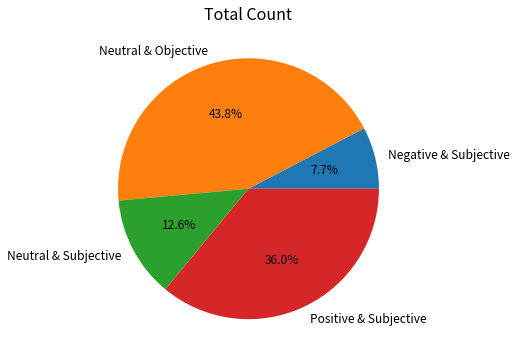

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷詞分析由 Neutral & Objective占多數**

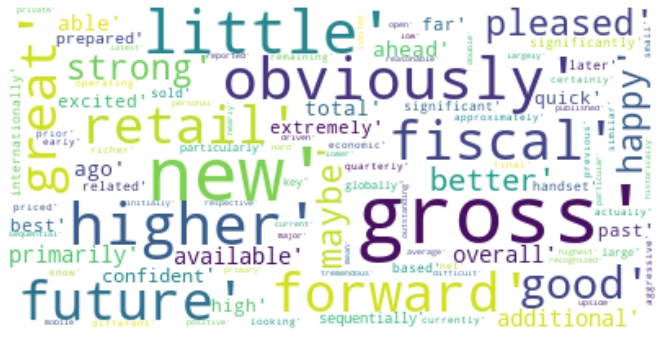

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,Apple Inc. (NASDAQ:AAPL),0.000000,0.000000
1,"F3Q08 Earnings Call July 21, 2008 5:00 PM ETEx...",0.114286,0.128571
2,Today’s call is being recorded.,0.000000,0.000000
3,At this time for opening remarks and introduct...,0.000000,0.000000
4,"Please go ahead, Madam.",0.000000,0.000000
...,...,...,...
401,Financial analysts can contact Joan Hoover or ...,0.000000,0.000000
402,Thanks again for joining us.,0.200000,0.200000
403,"OperatorLadies and gentlemen, that does conclu...",0.000000,0.000000
404,We do thank everyone for your participation.,0.000000,0.000000


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    406.000000
mean       0.132333
std        0.234187
min       -0.650000
25%        0.000000
50%        0.000000
75%        0.250000
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    406.000000
mean       0.296359
std        0.303386
min        0.000000
25%        0.000000
50%        0.250000
75%        0.500000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
_df

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
0,Apple Inc. (NASDAQ:AAPL),0.000000,0.000000,Neutral,Objective
1,"F3Q08 Earnings Call July 21, 2008 5:00 PM ETEx...",0.114286,0.128571,Positive,Subjective
2,Today’s call is being recorded.,0.000000,0.000000,Neutral,Objective
3,At this time for opening remarks and introduct...,0.000000,0.000000,Neutral,Objective
4,"Please go ahead, Madam.",0.000000,0.000000,Neutral,Objective
...,...,...,...,...,...
401,Financial analysts can contact Joan Hoover or ...,0.000000,0.000000,Neutral,Objective
402,Thanks again for joining us.,0.200000,0.200000,Positive,Subjective
403,"OperatorLadies and gentlemen, that does conclu...",0.000000,0.000000,Neutral,Objective
404,We do thank everyone for your participation.,0.000000,0.000000,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Objective,1
1,Negative,Subjective,38
2,Neutral,Objective,146
3,Neutral,Subjective,36
4,Positive,Subjective,185


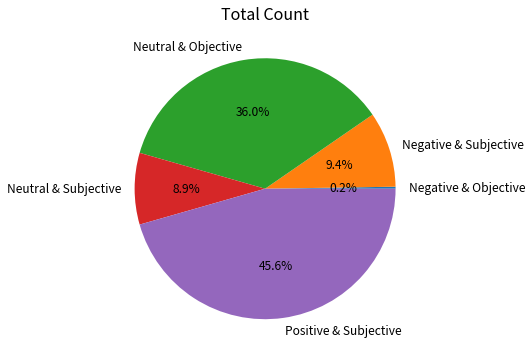

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Objective", "Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6)) 
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷句分析由 Positive & Subjective占多數**

#查看句子

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

1)Please note that some of the information you will hear during our discussion today may consist of forward-looking statements including without limitation those regarding revenue, iPhone sales, gross margin, operating expenses, other income and expense, stock-based compensation expense, taxes, earnings, and future products.

2)Before getting into the details of the quarter’s results, I would like to begin with a few points that demonstrate how well Apple has continued to perform.

3)iPod revenue grew 7% year over year, less than the unit rate of growth, due to lower ASPs driven largely by the Shuffle price reduction taken in February.

4)The store sold 476,000 Macs during the quarter, an increase of 44% year over year, and over half were sold to customers who have never owned a Mac before.

5)With an average of 211 stores open during the quarter, average revenue per store was $6.8 million compared to $5.1 million in the year-ago quarter, an increase of 33%.

6)We opened our first stor

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

1)Apple Inc. (NASDAQ:AAPL)

2)Today’s call is being recorded.

3)At this time for opening remarks and introductions, I would like to turn the call over to Ms. Nancy Paxton, Senior Director Investor Relations and Corporate Finance.

4)Please go ahead, Madam.

5)Nancy PaxtonThank you.

6)Speaking today is Apple CFO Peter Oppenheimer and he’ll be joined by Apple COO Tim Cook and Treasurer Gary Wipfler for the Q&A session with analysts.

7)With that, I would like to turn the call over to Peter Oppenheimer for introductory remarks.

8)Peter OppenheimerThank you, Nancy.

9)Thank you for joining us.

10)Net income was $1.07 billion, which was up 31% over the prior June quarter’s results, and translated to earnings per share of $1.19.

11)Sales of portables were up 37% year over year, driven by continued growth in demand for Macbooks and Macbook Pros, and the addition of Macbook Air to the portable lineup in January.

12)We ended the quarter with between three and four weeks of Mac channel inv

In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

1)Actual results or trends could differ materially from our forecasts.

2)Apple assumes no obligation to update any forward-looking statements or information which speak as of their respective dates.

3)I would like to now talk about our Mac products and services, which represented 61% of our total revenue in the June quarter.

4)Now I’d like to discuss our music products and services, which accounted for 33% of total revenue growth during the quarter.

5)We sold 11 million iPods, an increase of 12% from the year-ago quarter, with the growth being driven by Shuffle as well as the introduction of the iPod Touch last September.

6)As we indicated last month, we have now sold over 5 billion songs through iTunes and continue to build on our industry-leading catalog of content, which features over 8 million songs, 20,000 TV episodes, and 2,200 films, including over 450 in HD.

7)Total company gross margin was 34.8%, which exceeded our guidance by about 180 basis points as a result of severa

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

1)F3Q08 Earnings Call July 21, 2008 5:00 PM ETExecutivesNancy Paxton - Senior Director, Investor Relations and Corporate FinancePeter Oppenheimer - Chief Financial Officer, Senior Vice PresidentTimothy D. Cook - Chief Operating OfficerGary Wipfler - TreasurerAnalystsBill Fearnley - FTN MidwestRichard Gardner - CitigroupBen Reitzes - Lehman Brothers Andy Hargreaves - Pacific Crest SecuritiesCharles Wolf - Needham & CompanyGene Munster - Piper JaffrayDavid Bailey - Goldman SachsKeith Bachman - Bank of MontrealShannon Cross - Cross ResearchMark Moskowitz - J.P. MorganKaty Huberty - Morgan StanleyJeff Fidacaro - Merrill LynchToni Sacconaghi - Sanford BernsteinMike Abramsky - RBC Capital MarketsYair Reiner - Oppenheimer & CompanyShaw Wu - American Technology ResearchOperatorGood day and welcome to this Apple Incorporated Apple fiscal year 2008 third quarter results conference call.

2)Good afternoon and thanks to everyone for joining us.

3)For more information, please refer to the risk fac

#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

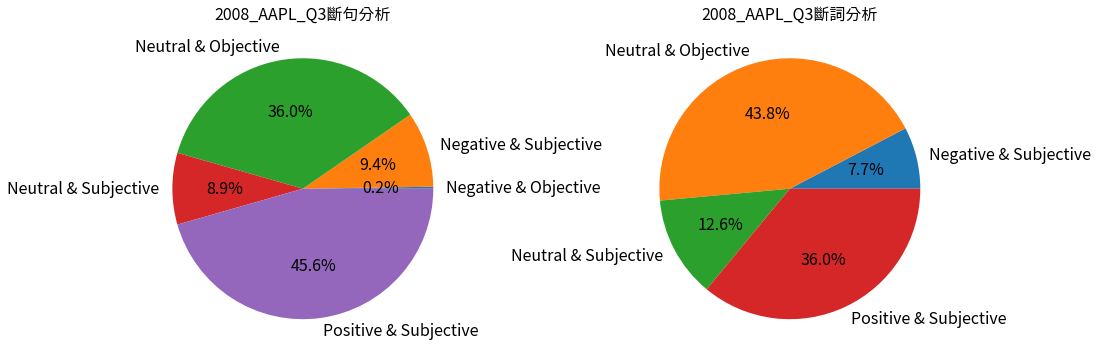

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label1 = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
label2 = ["Negative & Objective", "Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]


axs[1].pie(size, labels=label1, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[1].set_title('2008_AAPL_Q3斷詞分析', fontsize=16)


axs[0].pie(_size, labels=label2, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[0].set_title('2008_AAPL_Q3斷句分析', fontsize=16)


plt.savefig("2008_AAPL_Q3.png")
from google.colab import files
files.download("2008_AAPL_Q3.png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb to html
[NbConvertApp] Writing 1058246 bytes to /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.html
